# Regression With a Single Feature
## Using a single feature to make a numerical prediction

TO DO
- Fix the surface plot of the penalty function
- Make it easy to experiment with different penalty functions, learning rates, number of iterations, and subsets of the dataset.
- Fix Step 3 into 3a, b, and c.

**ACKNOWLEDGEMENT**

**The dataset used in this notebook is from Andrew Ng's course on Machine Learning on Coursera.**

Linear regression has been in use for hundreds of years. What place does it have in the shiny new field of machine learning? It's the same end result you've learned in the stats class you may have taken, but the method for getting there is via the steps of thinking like a machine outlined in the Nuts and Bolts notebook. We'll go through these steps again in this notebook.

## The Business Problem: Predicting Restaurant Profits

You're the CEO of a restaurant franchise. Your restaurants operate in a number of small towns. You're thinking of how to grow the business. Where's the best place to put the next restaurant?

For each restaurant your company owns and operates, you have the population of the town (in 1,000s) the restaurant is located in and the most recent year's profit generated by the restaurant (in 10,000s). You'd like to use this data to make some profit predictions and use these to prioritize locations for new restaurants.

Let's have a look at this data.

## Load the Data

In [1]:
# Load up the packages to investigate the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
# OS-independent way to navigate the file system
# Data directory is one directory up in relation to directory of this notebook
data_dir_root = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Where the file is
file_url = data_dir_root + os.sep + "Data" + os.sep + "food-truck-profits.txt"
# Load the data into a dataframe
data = pd.read_csv(file_url, header=None, names=['Population', 'Profit'])

In [3]:
# Quick check on what we have
data.shape

(97, 2)

This means that the dataset has 97 rows and 2 columns. Let's see what the data looks like.

The first few rows of our data look like this:

In [4]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Step 1: Understand the Data

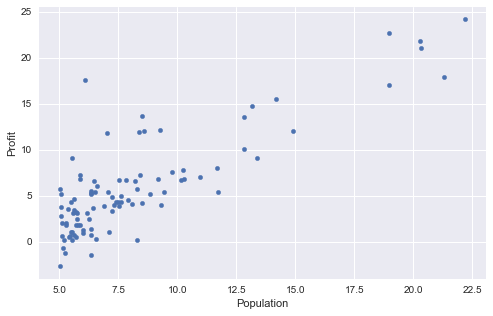

In [5]:
# Visualize the data
data.plot.scatter(x='Population', y='Profit', figsize=(8,5))

The complete data set can be described using the traditional statistical descriptors:

In [6]:
# Calculate some useful statistics showing how the data is distributed
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Exercise 1
Based on the descriptive statistics above, how would you summarize this data for the Board in a few sentences?

## Step 2: Define the Task You Want to Accomplish

The tasks that are possible to accomplish in a machine learning problem depend on how you slice up the dataset into features (inputs) and the target (output).

### Step 2a: Identify the Inputs
For this data, we have a single input or feature -- *town population*. We have 97 different town populations in our dataset. That's 97 different values for our single input variable. Keep in mind that each value is in 10,000s. So multipy the value you see by 10,000 to get the actual value of the population.

In [7]:
# Here are the input values
# Number of colums in our dataset
cols = data.shape[1]
# Inputs are in the first column - indexed as 0
X = data.iloc[:, 0:cols-1]
print("number of columns %d \n" %cols)
print("First few inputs \n %s" %X.head())

number of columns 2 

First few inputs 
    Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598


In [8]:
# The last few values of X
X.tail()

,Population
92,5.8707
93,5.3054
94,8.2934
95,13.3940
96,5.4369


### Step 2b: Identify the Output
The output is *annual restaurant profit*. For each value of the input we have a value for the output. Keep in mind that each value is in \$10,000s. So multipy the value you see by \$10,000 to get the actual annual profit for the restaurant.

Let's look at some of these output values.

In [9]:
# Here are the output vaues
# Outputs are in the second column - indexed as 1
y = data.iloc[:, cols-1:cols]
# See a sample of the outputs
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
# Last few items of the ouput
y.tail()

,Profit
92,7.20290
93,1.98690
94,0.14454
95,9.05510
96,0.61705


Once we've identified the inputs and the output, the task is easy to define: given the inputs, predict the output. So in this case, given a town's population, predict the profit a restarurant would generate. 

## Step 3: Define the Model

As we saw in the Nuts and Bolts session, a model is a way of transforming the inputs into the output.

For every row of the dataset, we use the same weights $w_{0}$ and $w_{1}$ to multiply each corresponding feature value in that row and summing like so:

$$(w_{0} * x_{0}) + (w_{1} * x_{1})$$

Depending on the values of the $w$s and the features, this gives us a value for the output -- $\hat{y}$ -- in that row of the dataset.

### SIDE BAR - Matrix Notation

Because our datasets typically have lots of rows, applying a model to a dataset means hundreds, if not millions of equations like the one above -- in fact, one for each row of the dataset. Matrix notation can express these millions of equations in a compact way using just a single line.

To see how matrix notation does this neat trick, first separate the dataset into the input features matrix $X$, the output values matrix $Y$.

Specifically, let 

$$X = 
\begin{bmatrix}
6.1101 \\
5.5277 \\
\vdots \\
13.394 \\
5.4369
\end{bmatrix}$$

and 

$$Y = 
\begin{bmatrix}
17.5920 \\
9.1302 \\
\vdots \\
9.05510 \\
0.61705
\end{bmatrix}$$

In this simple dataset both $X$ and $Y$ are matrices with 97 rows but only 1 column. In matrix notation, this dimension is written as (97 x 1) which is not a multiplication as we usually take it but a way of saying we have a matrix dimension of (m rows x n columns).

**Two Rules of Matrices to Keep in Mind (the only ones we'll need)**
1. When you add or subract matrices each matrix MUST have the SAME dimensions. Otherwise the operation of adding or subtracting a matrix doesn't make sense.
2. When you multiply two matrices together, say $X$ and $W$, the column dimension of the first MUST be the row dimension of the second. Otherwise the operation of multiplying two matrices doesn't make sense.

The equivalent of writing 

$$
(w_{0} * x_{0}^{(1)}) + (w_{1} * x_{1}^{(1)}) = y^{(1)} \\
(w_{0} * x_{0}^{(2)}) + (w_{1} * x_{1}^{(2)}) = y^{(2)} \\
(w_{0} * x_{0}^{(3)}) + (w_{1} * x_{1}^{(3)}) = y^{(3)} \\
(w_{0} * x_{0}^{(4)}) + (w_{1} * x_{1}^{(4)}) = y^{(4)} \\
\vdots \\
(w_{0} * x_{0}^{(96)}) + (w_{1} * x_{1}^{(96)}) = y^{(96)} \\
(w_{0} * x_{0}^{(97)}) + (w_{1} * x_{1}^{(97)}) = y^{(97)} \\
$$

is to write instead:

$$X * W = Y$$ 

where X and Y are the matrices above and W is a matrix that looks like

$$W = 
\begin{bmatrix}
w_{0} \\
w_{1} \\
\end{bmatrix}$$

It's as simple as that! And that's why matrix notation is handy.

## EXERCISE 2

Using the matrix rules above, what are the dimensions of the matrix $Y$?

## Step 4: Define the Penalty for Getting it Wrong
As we saw in the description of the model, $w_{0}$ and $w_{1}$ are the parameters of our model.

Let's pick a row from the dataset, assume values of -10 and 1 respectively for $w_{0}$ and $w_{1}$, and see what we get for the value of $\hat{y}$. We'll also subtract this from the actual ouput value of the row $y$ and define our penalty as $\hat{y} - y$.

We'll use the power of matrix multiplication to do these calculations without any fuss in the *computePenalty* function below.

## Exercise 3

Does the penalty we've chosen make sense? Convince yourself of this and write a paragraph explaining why it makes sense.

In [26]:
# Add a column of ones to the first column of a dataframe
# and turn it into a matrix
def df_addOnes(dataFrame):
    vals = dataFrame.values
    add_ones_column = zip(np.ones(len(dataFrame)), vals)
    feature_matrix = np.matrix([val for val in add_ones_column])
    
    return feature_matrix

In [141]:
# Making it easy to calculate the total penalty over the entire dataset
def penalty(df_features, df_output, paramater_value_list):
    
    # df_features is a dataframe of the features (no column of ones added)
    # df_output is a dataframe of the output column (target variable)
    # parameter_value_list is a list of w0, w1, ..., wn+1 where n is the number of features
    #  i.e., the number of columns in df_features.
    
    # Cost of being wrong calculated over the entire data set
    # Will take X and add a first column of 1s to it to enable the matrix multiplication
    # Therefore: X is an m x n matrix and theta is a n x 1 matrix
    
    #### Turn the function inputs into matrices ####
    # Get X and y into the right shapes for use in computeCost
    # Add a first column of ones to the feature matrix
    # Add a column of 1s to X 
    feature_matrix = df_addOnes(df_features)

    output_matrix = np.matrix(df_output.values)
    parameter_matrix = np.matrix(paramater_value_list).T
    
    # Difference between the predicted and the actual value
    error = (feature_matrix * parameter_matrix) - output_matrix
    
    # penaltyPerOutput is an m x 1 matrix where each element is the penalty for
    # the input and its associated output for a particular value of W
    
    # Use the squared error penalty function
    penaltyPerOutput = np.power(error, 2)
    
    # totalPenalty is the sum of the penalties of each row of the dataset
    totalPenalty = np.sum(penaltyPerOutput)
    
    # The penalty of getting it wrong is 1/2m of the totalPenalty (normalized penalty)
    # m is the number of rows in df_features
    totalPenaltyNorm = totalPenalty / (2 * len(df_features))
    
    return totalPenaltyNorm

In [142]:
penalty(X,y,[-1, 0.2])

34.147944848551802

### SIDEBAR -  How the Penalty is Usually Written

The cost of getting it wrong is defined as a function $J(W)$:

$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_{W}x^{(i)}) - y^{(i)})^2$$

What we're saying here: For each input, transform it using $w_{0}$ and $w_{1}$. This will give us a number. Subtract from this number the actual value of the output for that input. This gives us another number. Take this number and square it. This gives us our final result for that particular input. Add each of these final results -- one for each input we have in our dataset -- and divide it by $2m$ -- that is, twice the number of data points in our data set. This last division step is to make the cost of getting it wrong relative to the size of the dataset -- think of it simply as a mathematical convenience.

This way of writing things expresses exactly the same thing as writing out a series of equation would. That's why matrix notation is so powerful and widely used -- the matrix notation helps keep things short and sweet.

### How the Cost Varies as the $w_{0}$ and $w_{1}$ Values Change

In [123]:
# Generate a grid of values over w0 and w1
# w0 is between -5 and 5 (increments of 0.1)
# w1 is between -2 and 2 (increments of 0.1)
w0_vals, w1_vals = np.mgrid[-4:4:0.1, -2:2:0.1]
# Get arrays of theta0 and theta1 values
w_grid = np.c_[w0_vals.ravel(), w1_vals.ravel()]
len(w0_vals), w_grid.shape, w_grid[0].T, w_grid

(80, (3200, 2), array([-4., -2.]), array([[-4. , -2. ],
        [-4. , -1.9],
        [-4. , -1.8],
        ..., 
        [ 3.9,  1.7],
        [ 3.9,  1.8],
        [ 3.9,  1.9]]))

In [124]:
mesh_grid = np.meshgrid(w0_vals, w1_vals)

In [125]:
# Through the magic of matrix multiplication, we're going to calculate the cost for each pair of W values
cost_vals = [penalty(X, y, np.matrix(w_vals)) for w_vals in w_grid]

In [153]:
# The last few cost_vals
cost_vals[-5:]

array([  76.98114989,   82.70662486,   89.14445506,   96.41570423,
        104.66834932])

In [ ]:
# TO DO
# Plot the cost values
# Helpful tutorial at http://physicalmodelingwithpython.blogspot.com/2015/08/illuminating-surface-plots.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
# CAUTION Depending on the fineness of np.mgrid above, this can take a long time to execute
w0, w1 = np.meshgrid(w0_vals, w1_vals)
ax = Axes3D(plt.figure())
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
#ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w0, w1, cost_vals, rstride=1, cstride=1)
plt.xlabel('w0')

## Step 5: Find the Parameter Values that Minimize the Penalty

The cost function might have a minimum but how can we possibly find it? We can't use the brute force method of choosing every possible combination of values for $w_{0}$ and $w_{1}$ -- there are an infinite number of combinations and we'll never finish our task.

This is where the concept of *gradient descent* comes in. Imagine starting anywhere on the surface, say at $w_{0}$ at -10 and $w_{1}$ at -1. That's at the front edge of the plot above. If we took a step in the direction where the slope under our feet is steepest, then we would be one step closer to the "bottom" of the surface. So let's take that set and then take the next step in the direction where the slope under our feet is steepest. That gets us even lower and in the right direction to the bottom. Eventually, after a number of these steps, you'll get to the bottom.

That's the idea. To make it work, we have to write out an expression for the *next set of parameter values to try*. And it turns out that for the cost function $J(W)$, there is a well-worked out way to write these values for $w_{0}$ and $w_{1}$ based on the direction of the steepest slope.

**How To Choose the Next Set of Values for $W$**

$$w_{j} := w_{j} - \frac{\alpha}{m} \ [\sum_{i=1}^{m} (h_{W}(x^{(i)}) - y^{(i)}) x_{j}^{(i)}]$$

### Implement the Iterative Method of Gradient Descent

In [127]:
# Implement Gradient Descent
def gradientDescent(X, y, W, alpha, iters):
    # NOTE: X is the original dataframe -- need to add a column of ones to it and make it a matrix
    feature_matrix = df_addOnes(X)
    # feature_matrix is a m x n matrix
    # y is a m x 1 matrix
    # W is a n x 1 matrix
    
    # Keep track of everything
    sumError = np.zeros(shape=(len(W),1))
    sumErrorNorm = np.zeros(shape=(len(W),1))
    temp = np.matrix(np.zeros(W.shape))
    cost = np.zeros(iters)
    
    for i in range(iters):
        # Calculate the non-normalized values for each W parameter
        error = (feature_matrix * W) - y
        # return feature_matrix.shape, W.shape, y.shape, error, feature_matrix[:,1]
        
        for j in range(len(W)):
            # Multiply the error vector by the appropriate column of the feature_matrix and sum it
            sumError[j] = np.sum(np.multiply(error, feature_matrix[:,j]))
            
            # Normalize the sumError using alpha and m
            sumErrorNorm[j] = np.divide(np.multiply(sumError[j], alpha), len(feature_matrix))
            
            temp[j,0] = W[j,0] - sumErrorNorm[j]
        
        W = temp
    
        # Use the original dataframe in this call
        # the penalty function likes to see W.T as input
        cost[i] = penalty(X,y,W.T)
            
    # Return the value of W after iters iterations of gradient descent
    # Return the penalty = cost for this W
    return W, cost

In [73]:
gradientDescent(X,y,W_init, alpha_init, iters_init)

(matrix([[-3.87231084],
         [ 1.19067582]]),
 array([ 4.6584565 ,  4.54837848,  4.5446635 , ...,  4.47702189,
         4.47702171,  4.47702152]))

Run the iterative gradient descent method to determine the optimal parameter values.

In [144]:
# Initialize W, alpha, and iters
W_init = np.matrix('0.008;0.8')
alpha_init = 0.01 # the learning rate
iters_init = 1000 # number of iterations

In [145]:
# Run gradient descent and capture the progression of cost values and the ultimate optimal theta values
%time W_opt, cost_vals = gradientDescent(X, y, W_init, alpha_init, iters_init)
# Get the optimal theta values and the last few cost values
W_opt, cost_vals[-10:-1]

CPU times: user 403 ms, sys: 4.23 ms, total: 407 ms
Wall time: 408 ms


(matrix([[-3.25319518],
         [ 1.12847894]]),
 array([ 56.07351582,  59.44136815,  63.16209147,  67.28495692,
         71.86821942,  76.98114989,  82.70662486,  89.14445506,  96.41570423]))

We can see that the cost is still getting smaller even after 2000 interations...but at the 4th decimal place.

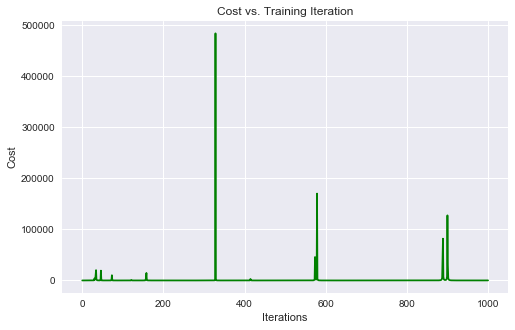

In [146]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(iters_init), cost_vals, 'g')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs. Training Iteration')

## Exercise 4
Experiment with different values of alpha, W, and iters. Write down your observations.

## Step 6: Use the Model and Optimal Parameter Values to Make Predictions
Let's see how our optimal parameter values can be used to make predictions.

In [147]:
W_opt[0,0], W_opt[1,0]

(-3.2531951819279952, 1.1284789409774243)

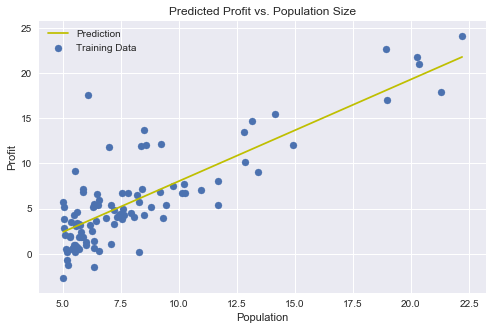

In [148]:
# Create 100 equally spaced values going from the minimum value of population 
# to the maximum value of the population in the dataset.
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = W_opt[0, 0] + (W_opt[1, 0] * x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, f, 'y', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.legend(loc='upper left')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [160]:
# Prediction of profit given a population size in 
populations = [5, 6, 12, 14, 15]
profits = [W_opt[0, 0] + (W_opt[1, 0] * pop * 10000) for pop in populations]
print(['{:5,.0f}'.format(profit) for profit in profits])

['56,421', '67,705', '135,414', '157,984', '169,269']


## Exercise 5

Now you can make predictions of profit based on your data. What are the predicted profits for populations of 50,000, 100,000, 160,000, and 180,000? Are the predictions reasonable? Explain why or why not?

## Exercise 6

What happens to the optimal values of W if we use just half of the dataset? How does this relate to Tom Mitchell's definition of machine learning?

## Step 7: Measure the Performance of the Model

We're going to delay this step until later on in the course.

## Summary
We took the steps we learned in the ML-Nuts-and-Bolts notebook and applied them to one of the simplest problems in data science. The problem may have been simple but the concepts or the way of looking at the problem is what's important. We looked at the problem through the eyes of a machine -- one that learns a set of optimal parameters from a dataset. The optimal values depend on the penalty function, the learning rate, and the number of iterations. And of course the optimal values definitely depend on the dataset -- that's what it is to learn from experience! 

In the next notebook we'll extend our techniques to regression with multiple input variables.